In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
df = pd.read_excel('Moniready Loan Application Form Final  (1).xlsx')

# Getting all data for loan payback and not payback

In [3]:
df.rename(columns={'Loan Status ':'Loan_Status'},inplace=True)
# removing all rejected tuples
df = df[df['Loan_Status']!='Rejected']
#converting bad loan payback & good loan into payback, and bad loan into not payback
def conversion_for_loan_status(x):
    if(x=="Good Loan" or x=='Bad Loan Payback'):
        return "payback"
    elif(x=='Bad Loan ' or x=='Bad Loan'):
        return "not payback"
    else:
        return x
    
df['Loan_Status'] = df['Loan_Status'].apply(lambda x:conversion_for_loan_status(x))

In [4]:
df['Loan_Status'].unique()

array(['payback', nan, 'not payback'], dtype=object)

# Removing columns that contains more than 30% null values

In [5]:
# Total length of dataset
total_rows = len(df)


#If a column holds more than 30% null values than it will be neglected
for x in df.columns:
    if( round(((df[x].isna().sum())/total_rows)*100,2) > 30.0  ):
        df.drop(columns=x,axis=1,inplace=True)

df

,Loan_Status,Submission Datefari,First Name,Last Name,Gender,Nationality,How Old Are you ?,Marital Status,Select your employment status below,What is your occupation ?,How long have you been working with your present EMPLOYER?,Residential Status,Street Address,Parish,Country,How long have you been living at your present address?,How many kids do you have ?,What is the main purpose of the loan?,How much money do you want to borrow ?,How long do you want the loan to last ?,What is your take home salary after tax each month ?,Do you have any additional source of income ?,How much does this additional source of income provide monthly ?,How much do you spend on food every month?,How much do you spend on transportation every month?,How much do you spend on light per month?,How much do you spend on water per month?,How much do you spend on grooming every month?,How much do you spend on entertainment every month?,Enter Mobile Phone Number,Enter Work Phone Number,Email Address,IP,Submission ID,Edit Link
5,payback,2020-08-18 06:05:21,Shadaa,Muir,Female,Jamaican,32.0,Single,Employed,Sales,Less than a year,Living With Parents,Maverley,Kingston Jamaica,Jamaica,25+ years,More than 2,Personal,90000.0,6 months,200000.00,YES,30000.0,3.000000e+04,1500.0,4000,4000.0,0.0,5000.0,8763744566,8764216338,shadaa.muir1988@gmail.com,104.244.230.173,4.735579e+18,Edit Submission
74,payback,2020-09-16 15:49:52,Shalphina,Cohall,Female,Jamaican,32.0,Single,Employed,Customer Service,2 - 4 years,Other,Aviary,St Catherine,Jamaica,2 - 4 years,2,Personal,80000.0,6 months,163000.00,NO,NaN,5.000000e+03,0.0,10000,1500.0,0.0,0.0,8762450888,8765512185,shameka.cohall@outlook.com,207.204.64.5,4.760986e+18,Edit Submission
183,payback,2019-03-31 12:53:58,Karim,Smith,Male,Jamaican,NaN,Single,Employed,Other,Less than a year,Family Residence,14 Sonny Bradshaw Avenue,St Andrew,Jamaica,25+ years,0,Personal,60000.0,5 months,68400.00,NO,NaN,2.000000e+04,10000.0,8000,4000.0,4000.0,4000.0,8764912550,8764912550,karimandrewsmith@gmail.com,63.143.117.79,4.298640e+18,Edit Submission
184,NaN,2019-03-31 16:37:36,Karim,Smith,Male,Jamaican,NaN,Single,Employed,Other,Less than a year,Family Residence,14 Sonny Bradshaw Avenue,St Andrew,Jamaica,25+ years,0,Personal,40000.0,5 months,68400.00,NO,NaN,2.000000e+04,10000.0,4000,0.0,2000.0,4000.0,8764912550,8764912550,karimandrewsmith@gmail.com,63.143.116.8,4.298775e+18,Edit Submission
189,payback,2019-04-14 19:10:11,Micaela,Sucklal,Female,Jamaican,NaN,Single,Employed,Other,Less than a year,Family Residence,Phadrian Ave,Kingston,Jamaica,2 - 4 years,0,Clothing,50000.0,5 months,114000.00,YES,15000.0,5.000000e+03,12000.0,0,0.0,3500.0,10000.0,8763567716,8763567716,micaela.sucklal@gmail.com,72.252.30.224,4.310962e+18,Edit Submission
199,not payback,2019-04-24 18:37:27,Blair,Whittingham,Female,Jamaican,NaN,Single,Employed,Sales,1 year,Family Residence,Lot 45 B Aston Ridge,St. Andrew,Jamaica,10- 24 years,1,Personal,100.0,5 months,132000.00,YES,45000.0,5.000000e+03,15000.0,0,0.0,6000.0,0.0,8762962242,8763626720,milan.whittingham@gmail.com,104.244.227.111,4.319582e+18,Edit Submission
214,not payback,2019-05-25 19:04:25,RayMonA,Blake,Female,Jamaican,31.0,Single,Employed,Corporate Worker,1 year,Rent,1 Spring Park close,Kingston,Jamaica,Less than a year,0,Personal,60000.0,6 months,120000.00,NO,NaN,1.200000e+04,3000.0,0,0.0,1000.0,0.0,8768560815,8764877017,rblake1988@gmail.com,104.244.230.100,4.346383e+18,Edit Submission
219,payback,2019-05-31 12:33:20,ROHAN,THOMPSON,Male,Jamaican,32.0,Married,Employed,Financial Advisor,Less than a year,Family Residence,J4 Bedward Crescent,Kingston 7,Jamaica,25+ years,More than 2,Personal,100000.0,6 months,150000.00,NO,0.0,1.000000e+04,8000.0,0,0.0,1500.0,0.0,8764662962,8766181765,rohanthompson27@gmail.com,72.252.35.52,4.351332e+18,Edit Submission
220,payback,2019-06-02 11:36:53,Mellisa,Corrie,Female,Jamaican,33.0,Single,Self Employed,Skilled Worker,5-9 years,Family Residence,Dunrobin Park,Kingston,Jamaica,10- 24 years,2,Busines

# Removing unnecessary columns

In [6]:
df.drop(labels=['Submission Datefari','First Name','Last Name','Street Address','Parish','Country','Enter Mobile Phone Number','IP','Submission ID','Edit Link','Email Address','Enter Work Phone Number\xa0'],axis=1,inplace=True)

In [7]:
df.columns

Index(['Loan_Status', 'Gender', 'Nationality', 'How Old Are you ?',
       'Marital Status', 'Select your employment status below',
       'What is your occupation ?',
       'How long have you been working with your present EMPLOYER?',
       'Residential Status',
       'How long have you been living at your present address?',
       'How many kids do you have ?', 'What is the main purpose of the loan?',
       'How much money do you want to borrow ?',
       'How long do you want the loan to last ?',
       'What is your take home salary after tax each month ?',
       'Do you have any additional source of income ?',
       'How much does this additional source of income provide monthly ?',
       'How much do you spend on food every month?',
       'How much do you spend on transportation every month?',
       'How much do you spend on light per month?',
       'How much do you spend on water per month?',
       'How much do you spend on grooming every month?',
       'How much do 

In [8]:
def convert_object_to_float(x):
    return float(x)

def convert_loan_duration(x):
    try:
        y = x.split(" ")
        return float(y[0])
    except:
        return x

df['How long do you want the loan to last ?'] = df['How long do you want the loan to last ?'].apply(lambda x:convert_loan_duration(x))


df['How much do you spend on light per month?'] = df['How much do you spend on light per month?'].apply(lambda x:convert_object_to_float(x))

cols_to_hotOneEncoding = []
for x in df.columns:
    if(df[x].dtype==object and x!='Loan_Status'):
        cols_to_hotOneEncoding.append(x)
df

,Loan_Status,Gender,Nationality,How Old Are you ?,Marital Status,Select your employment status below,What is your occupation ?,How long have you been working with your present EMPLOYER?,Residential Status,How long have you been living at your present address?,How many kids do you have ?,What is the main purpose of the loan?,How much money do you want to borrow ?,How long do you want the loan to last ?,What is your take home salary after tax each month ?,Do you have any additional source of income ?,How much does this additional source of income provide monthly ?,How much do you spend on food every month?,How much do you spend on transportation every month?,How much do you spend on light per month?,How much do you spend on water per month?,How much do you spend on grooming every month?,How much do you spend on entertainment every month?
5,payback,Female,Jamaican,32.0,Single,Employed,Sales,Less than a year,Living With Parents,25+ years,More than 2,Personal,90000.0,6.0,200000.00,YES,30000.0,3.000000e+04,1500.0,4000.0,4000.0,0.0,5000.0
74,payback,Female,Jamaican,32.0,Single,Employed,Customer Service,2 - 4 years,Other,2 - 4 years,2,Personal,80000.0,6.0,163000.00,NO,NaN,5.000000e+03,0.0,10000.0,1500.0,0.0,0.0
183,payback,Male,Jamaican,NaN,Single,Employed,Other,Less than a year,Family Residence,25+ years,0,Personal,60000.0,5.0,68400.00,NO,NaN,2.000000e+04,10000.0,8000.0,4000.0,4000.0,4000.0
184,NaN,Male,Jamaican,NaN,Single,Employed,Other,Less than a year,Family Residence,25+ years,0,Personal,40000.0,5.0,68400.00,NO,NaN,2.000000e+04,10000.0,4000.0,0.0,2000.0,4000.0
189,payback,Female,Jamaican,NaN,Single,Employed,Other,Less than a year,Family Residence,2 - 4 years,0,Clothing,50000.0,5.0,114000.00,YES,15000.0,5.000000e+03,12000.0,0.0,0.0,3500.0,10000.0
199,not payback,Female,Jamaican,NaN,Single,Employed,Sales,1 year,Family Residence,10- 24 years,1,Personal,100.0,5.0,132000.00,YES,45000.0,5.000000e+03,15000.0,0.0,0.0,6000.0,0.0
214,not payback,Female,Jamaican,31.0,Single,Employed,Corporate Worker,1 year,Rent,Less than a year,0,Personal,60000.0,6.0,120000.00,NO,NaN,1.200000e+04,3000.0,0.0,0.0,1000.0,0.0
219,payback,Male,Jamaican,32.0,Married,Employed,Financial Advisor,Less than a year,Family Residence,25+ years,More than 2,Personal,100000.0,6.0,150000.00,NO,0.0,1.000000e+04,8000.0,0.0,0.0,1500.0,0.0
220,payback,Female,Jamaican,33.0,Single,Self Employed,Skilled Worker,5-9 years,Family Residence,10- 24 years,2,Business Equipment,40000.0,3.0,150000.00,YES,25000.0,2.000000e+04,20000.0,8000.0,3000.0,0.0,0.0
244,not payback,Female,Jamaican,34.0,Single,Employed,Manager,5-9 years,Family Residence,25+ years,2,Personal,60000.0,6.0,75000.00,YES,80000.0,1.500000e+04,5000.0,2500.0,1000.0,2000.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 5 to 1048
Data columns (total 23 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Loan_Status                                                       41 non-null     object 
 1   Gender                                                            42 non-null     object 
 2   Nationality                                                       42 non-null     object 
 3   How Old Are you ?                                                 38 non-null     float64
 4   Marital Status                                                    42 non-null     object 
 5   Select your employment status below                               42 non-null     object 
 6   What is your occupation ?                                         42 non-null     object 
 7   How long have you been working with

In [10]:
cols_to_hotOneEncoding

['Gender',
 'Nationality',
 'Marital Status',
 'Select your employment status below',
 'What is your occupation ?',
 'How long have you been working with your present EMPLOYER?',
 'Residential Status',
 'How long have you been living at your present address?',
 'How many kids do you have ?',
 'What is the main purpose of the loan?',
 'Do you have any additional source of income ?']

In [11]:
for x in cols_to_hotOneEncoding:
    temp_col = pd.get_dummies(df[x],drop_first=True)
    df = df.merge(temp_col,how='inner',on=df.index)
    df.drop(columns=[x,'key_0'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 53 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Loan_Status                                                       41 non-null     object 
 1   How Old Are you ?                                                 38 non-null     float64
 2   How much money do you want to borrow ?                            42 non-null     float64
 3   How long do you want the loan to last ?                           42 non-null     float64
 4   What is your take home salary after tax each month ?              42 non-null     float64
 5   How much does this additional source of income provide monthly ?  33 non-null     float64
 6   How much do you spend on food every month?                        42 non-null     float64
 7   How much do you spend on transportati

In [13]:
target_dict = {'not payback':0,'payback':1}
df = df.replace({'Loan_Status':target_dict})

df

,Loan_Status,How Old Are you ?,How much money do you want to borrow ?,How long do you want the loan to last ?,What is your take home salary after tax each month ?,How much does this additional source of income provide monthly ?,How much do you spend on food every month?,How much do you spend on transportation every month?,How much do you spend on light per month?,How much do you spend on water per month?,How much do you spend on grooming every month?,How much do you spend on entertainment every month?,Male,Married,Other_x,Single,Self Employed,Clerk,Corporate Worker,Customer Service,Financial Advisor,House Hold Helper,Manager,Nurse Or Teacher,Other_y,Professional,Sales,Skilled Worker,Supervisor,10- 24 years_x,2 - 4 years_x,25+ years_x,5-9 years_x,Less than a year_x,Living With Parents,Other,Owner: Fully Paid,Owner: Paying Mortgage,Rent,10- 24 years_y,2 - 4 years_y,25+ years_y,5-9 years_y,Less than a year_y,1,2,More than 2,Clothing,"Laundry - Washer, Dryer",Personal,Stoves,Travel,YES
0,1.0,32.0,90000.0,6.0,200000.00,30000.0,3.000000e+04,1500.0,4000.0,4000.0,0.0,5000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
1,1.0,32.0,80000.0,6.0,163000.00,NaN,5.000000e+03,0.0,10000.0,1500.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,1.0,NaN,60000.0,5.0,68400.00,NaN,2.000000e+04,10000.0,8000.0,4000.0,4000.0,4000.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,NaN,NaN,40000.0,5.0,68400.00,NaN,2.000000e+04,10000.0,4000.0,0.0,2000.0,4000.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1.0,NaN,50000.0,5.0,114000.00,15000.0,5.000000e+03,12000.0,0.0,0.0,3500.0,10000.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
5,0.0,NaN,100.0,5.0,132000.00,45000.0,5.000000e+03,15000.0,0.0,0.0,6000.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
6,0.0,31.0,60000.0,6.0,120000.00,NaN,1.200000e+04,3000.0,0.0,0.0,1000.0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
7,1.0,32.0,100000.0,6.0,150000.00,0.0,1.000000e+04,8000.0,0.0,0.0,1500.0,0.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
8,1.0,33.0,40000.0,3.0,150000.00,25000.0,2.000000e+04,20000.0,8000.0,3000.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
9,0.0,34.0,60000.0,6.0,75000.00,80000.0,1.500000e+04,5000.0,2500.0,1000.0,2000.0,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1


In [14]:
correlation_data = df.corr()

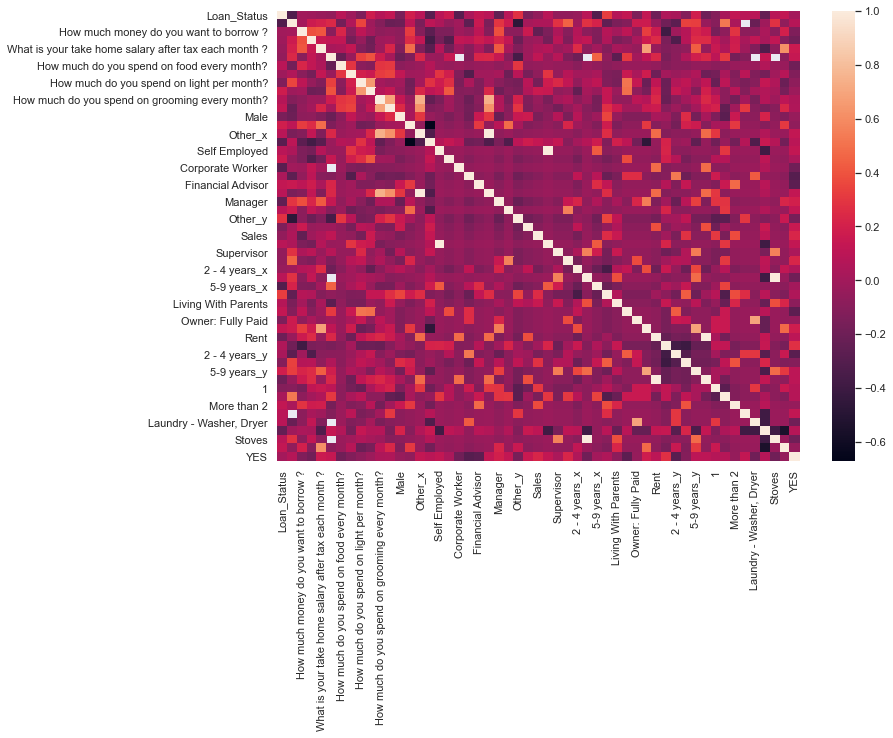

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlation_data)

In [16]:

#Setting Standard Range (-0.1 , +0.1).
#Any Feature lies in this range will be omit 

cols_to_be_selected = []
all_cols = correlation_data.columns
index = 0;

for x in correlation_data['Loan_Status'].tolist():
    if(x >= -0.2 and x <=0.2):
        #neglecting the feature / column
        pass
    else:
        cols_to_be_selected.append(all_cols[index])
    index += 1

cols_to_be_selected

['Loan_Status',
 'How Old Are you ?',
 'Single',
 'Corporate Worker',
 'Manager',
 'Other_y',
 '5-9 years_x',
 'Less than a year_x',
 'Personal']

In [17]:
df_temp = df
df_temp['Loan_Status'].value_counts()

1.0    31
0.0    10
Name: Loan_Status, dtype: int64

In [18]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 53 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Loan_Status                                                       41 non-null     float64
 1   How Old Are you ?                                                 38 non-null     float64
 2   How much money do you want to borrow ?                            42 non-null     float64
 3   How long do you want the loan to last ?                           42 non-null     float64
 4   What is your take home salary after tax each month ?              42 non-null     float64
 5   How much does this additional source of income provide monthly ?  33 non-null     float64
 6   How much do you spend on food every month?                        42 non-null     float64
 7   How much do you spend on transportati

In [19]:
df_temp['How much does this additional source of income provide monthly ?'] = df_temp['How much does this additional source of income provide monthly ?'].fillna(value=0)

In [20]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 53 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Loan_Status                                                       41 non-null     float64
 1   How Old Are you ?                                                 38 non-null     float64
 2   How much money do you want to borrow ?                            42 non-null     float64
 3   How long do you want the loan to last ?                           42 non-null     float64
 4   What is your take home salary after tax each month ?              42 non-null     float64
 5   How much does this additional source of income provide monthly ?  42 non-null     float64
 6   How much do you spend on food every month?                        42 non-null     float64
 7   How much do you spend on transportati

In [21]:
df_temp.dropna(axis=0,how='any',inplace=True)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 41
Data columns (total 53 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Loan_Status                                                       38 non-null     float64
 1   How Old Are you ?                                                 38 non-null     float64
 2   How much money do you want to borrow ?                            38 non-null     float64
 3   How long do you want the loan to last ?                           38 non-null     float64
 4   What is your take home salary after tax each month ?              38 non-null     float64
 5   How much does this additional source of income provide monthly ?  38 non-null     float64
 6   How much do you spend on food every month?                        38 non-null     float64
 7   How much do you spend on transportati

In [24]:
from imblearn.combine import SMOTETomek
from collections import Counter

X = df_temp.iloc[:,1:]
Y = df_temp[['Loan_Status']]

smk = SMOTETomek(random_state=42)
X_res, Y_res = smk.fit_sample(X,Y)


In [30]:
X_res['Loan Status'] = Y_res['Loan_Status']
X_res

,How Old Are you ?,How much money do you want to borrow ?,How long do you want the loan to last ?,What is your take home salary after tax each month ?,How much does this additional source of income provide monthly ?,How much do you spend on food every month?,How much do you spend on transportation every month?,How much do you spend on light per month?,How much do you spend on water per month?,How much do you spend on grooming every month?,How much do you spend on entertainment every month?,Male,Married,Other_x,Single,Self Employed,Clerk,Corporate Worker,Customer Service,Financial Advisor,House Hold Helper,Manager,Nurse Or Teacher,Other_y,Professional,Sales,Skilled Worker,Supervisor,10- 24 years_x,2 - 4 years_x,25+ years_x,5-9 years_x,Less than a year_x,Living With Parents,Other,Owner: Fully Paid,Owner: Paying Mortgage,Rent,10- 24 years_y,2 - 4 years_y,25+ years_y,5-9 years_y,Less than a year_y,1,2,More than 2,Clothing,"Laundry - Washer, Dryer",Personal,Stoves,Travel,YES,Loan Status
0,32.000000,90000.000000,6.000000,200000.000000,30000.000000,3.000000e+04,1500.000000,4000.000000,4000.000000,0.000000,5000.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1.0
1,32.000000,80000.000000,6.000000,163000.000000,0.000000,5.000000e+03,0.000000,10000.000000,1500.000000,0.000000,0.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1.0
2,31.000000,60000.000000,6.000000,120000.000000,0.000000,1.200000e+04,3000.000000,0.000000,0.000000,1000.000000,0.000000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0
3,32.000000,100000.000000,6.000000,150000.000000,0.000000,1.000000e+04,8000.000000,0.000000,0.000000,1500.000000,0.000000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1.0
4,33.000000,40000.000000,3.000000,150000.000000,25000.000000,2.000000e+04,20000.000000,8000.000000,3000.000000,0.000000,0.000000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1.0
5,32.000000,30000.000000,6.000000,46656.000000,20000.000000,8.000000e+03,4000.000000,5000.000000,1500.000000,2000.000000,2000.000000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1.0
6,20.000000,60000.000000,3.000000,95000.000000,20000.000000,1.500000e+04,6000.000000,0.000000,0.000000,5000.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1.0
7,24.000000,44000.000000,6.000000,60000.000000,60000.000000,1.000000e+04,8000.000000,4000.000000,4000.000000,20000.000000,18000.000000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1.0
8,39.000000,50000.000000,6.000000,130000.000000,16000.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1.0
9,37.000000,50000.000000,2.000000,79000.000000,15000.000000,2.000000e+04,15000.000000,5000.000000,3000.000000,2000.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1.0


In [31]:
correlation_data_1 = X_res.corr()
correlation_data_1

,How Old Are you ?,How much money do you want to borrow ?,How long do you want the loan to last ?,What is your take home salary after tax each month ?,How much does this additional source of income provide monthly ?,How much do you spend on food every month?,How much do you spend on transportation every month?,How much do you spend on light per month?,How much do you spend on water per month?,How much do you spend on grooming every month?,How much do you spend on entertainment every month?,Male,Married,Other_x,Single,Self Employed,Clerk,Corporate Worker,Customer Service,Financial Advisor,House Hold Helper,Manager,Nurse Or Teacher,Other_y,Professional,Sales,Skilled Worker,Supervisor,10- 24 years_x,2 - 4 years_x,25+ years_x,5-9 years_x,Less than a year_x,Living With Parents,Other,Owner: Fully Paid,Owner: Paying Mortgage,Rent,10- 24 years_y,2 - 4 years_y,25+ years_y,5-9 years_y,Less than a year_y,1,2,More than 2,Clothing,"Laundry - Washer, Dryer",Personal,Stoves,Travel,YES,Loan Status
How Old Are you ?,1.000000,0.104089,0.108363,0.218447,0.346448,-0.180855,0.153597,0.613297,0.202903,-0.039764,-0.165931,-0.216615,0.038867,-0.161847,0.174275,0.009343,0.013344,-0.028699,-0.288376,0.094847,-0.161847,2.349321e-01,0.123469,-0.474668,-0.049127,-0.000240,0.009343,1.899333e-01,0.341417,-0.154346,0.218575,1.172931e-01,-0.287482,-0.196668,-0.009678,1.084306e-01,0.108431,-8.857505e-02,-0.254861,-0.256868,0.202348,0.218176,-8.857505e-02,-0.149718,0.361498,-0.013823,NaN,-0.218910,0.057988,0.218575,-0.095326,0.065845,-3.773641e-01
How much money do you want to borrow ?,0.104089,1.000000,0.346017,0.465411,0.052483,0.203126,-0.072915,0.181947,-0.019256,-0.063714,-0.124169,-0.021088,0.256014,-0.150518,-0.171436,-0.175778,-0.251061,-0.049478,-0.129957,0.064626,-0.150518,2.885613e-01,-0.112628,-0.086893,0.090685,-0.070668,-0.175778,-2.557012e-02,-0.161822,-0.014545,-0.112628,-1.996416e-01,-0.002146,-0.073320,0.076823,-1.157666e-01,0.290118,1.062989e-01,-0.481716,-0.088540,0.063920,0.172945,1.062989e-01,-0.205426,-0.174703,0.245019,NaN,-0.112628,0.085829,-0.112628,0.154823,-0.126831,-2.770218e-01
How long do you want the loan to last ?,0.108363,0.346017,1.000000,0.110004,-0.029159,0.130140,-0.012731,0.094030,0.096872,-0.032093,0.089139,-0.143048,0.268275,0.130133,-0.396269,-0.154100,-0.152438,0.130133,0.126567,0.185866,0.130133,1.706152e-01,0.130133,-0.234543,-0.005844,-0.017116,-0.154100,5.054488e-02,-0.104884,0.079936,0.130133,-1.711946e-01,0.023431,-0.112362,0.130133,5.054488e-02,0.185866,2.682752e-01,-0.139522,-0.205304,0.061553,0.229950,2.682752e-01,0.099676,-0.000428,0.185866,NaN,0.130133,0.005844,0.130133,-0.084777,-0.327233,7.056072e-02
What is your take home salary after tax each month ?,0.218447,0.465411,0.110004,1.000000,0.199227,0.024313,0.151334,0.029720,-0.089249,-0.010532,0.232378,-0.064485,0.453561,-0.146560,-0.223079,0.055778,-0.161716,-0.011668,-0.141338,0.010629,-0.146560,4.952743e-01,0.010814,-0.097047,-0.066390,-0.000610,0.055778,-4.556478e-02,-0.027239,0.197112,-0.094851,1.765913e-02,-0.111566,-0.025262,0.085005,-7.125340e-02,0.661193,-8.778235e-02,-0.223440,-0.103424,-0.001600,0.489474,-8.778235e-02,0.083702,0.031698,0.159944,NaN,-0.146560,-0.302943,-0.094851,0.596972,0.110423,-7.706631e-02
How much does this additional source of income provide monthly ?,0.346448,0.052483,-0.029159,0.199227,1.000000,-0.153827,-0.051533,0.302980,0.379675,0.216998,0.174270,0.020656,-0.085479,0.288331,0.030884,0.030391,0.043407,-0.153851,-0.306864,0.306558,0.288331,1.006355e-01,-0.035936,-0.216237,0.139454,0.148668,0.030391,-8.816824e-02,-0.007070,-0.097414,-0.153851,2.525658e-01,0.070773,-0.159213,-0.153851,-6.185314e-02,0.201298,2.145833e-01,0.078038,-0.314725,-0.003361,0.075407,2.145833e-01,0.055946,0.249636,-0.061853,NaN,-0.153851,0.118037,-0.153851,0.017092,0.436121,3.080632e-02
How much do you spend on food every month?,-0.180855,0.203126,0.130140,0.024313,-0.153827,1.000000,0.308196,-0.087997,-0.093363,0.294849,0.336211,-0.068333,-0.040423,

In [37]:

#Setting Standard Range (-0.1 , +0.1).
#Any Feature lies in this range will be omit 

cols_to_be_selected = []
all_cols = correlation_data_1.columns
index = 0;

for x in correlation_data_1['Loan Status'].tolist():
    if(x >= -0.2 and x <=0.2):
        #neglecting the feature / column
        pass
    else:
        cols_to_be_selected.append(all_cols[index])
    index += 1

cols_to_be_selected

['How Old Are you ?',
 'How much money do you want to borrow ?',
 'How much do you spend on light per month?',
 'Married',
 'Single',
 'Clerk',
 'Other_y',
 'Sales',
 'Less than a year_x',
 'Living With Parents',
 '10- 24 years_y',
 '5-9 years_y',
 2,
 'Clothing',
 'Personal',
 'Loan Status']

In [ ]:
# from imblearn.combine import SMOTETomek
# from collections import Counter

# X = df_temp[['How Old Are you ?','Single','Corporate Worker','Manager','Other_y','5-9 years_x','Less than a year_x','Personal']
# Y = df_temp[['Target']]

# smk = SMOTETomek(random_state=42)
# X_res, Y_res = smk.fit_sample(X,Y)
            